In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 
from datetime import datetime

from scipy.stats import *
np.set_printoptions(precision=6, suppress=True)


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 1. csv 불러오기

In [3]:
busan2020 = pd.read_csv('./movie_result/busan_movie_2020.csv',thousands=',').drop('Unnamed: 0',axis=1)
seoul2020 = pd.read_csv('./movie_result/seoul_movie_2020.csv',thousands=',').drop('Unnamed: 0',axis=1)

In [4]:
busan_tmp = pd.read_csv('./movie_result/2021_~02부산.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:]
seoul_tmp = pd.read_csv('./movie_result/2021_~02서울.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:]

In [5]:
# 202008~202002 df합치기
# busan_bv = pd.concat([busan2020,busan_tmp]).reset_index(drop=True)
seoul_bv = pd.concat([seoul2020,seoul_tmp]).reset_index(drop=True)

In [6]:
seoul_av = pd.read_csv('./movie_result/2021_03~06서울.csv',thousands=',').drop('Unnamed: 0',axis=1)[1:].reset_index(drop=True)
avr_2019 = pd.read_csv('./movie_result/2019_평균자료_영화.csv')

In [7]:
#string type을 datetime형으로 변환
seoul_bv['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in seoul_bv['주']]
seoul_av['주'] = [datetime.strptime(i,"%Y-%m-%d") for i in seoul_av['주']]

In [8]:
seoul_bv
seoul_av

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


,지역,매출액,관객수,주
0,서울시,2370034110,245237,2021-03-12
1,서울시,2089378170,221908,2021-03-19
2,서울시,2156717370,223590,2021-03-26
3,서울시,2394668990,261118,2021-04-02
4,서울시,1826626560,193633,2021-04-09
5,서울시,1481982720,158687,2021-04-16
6,서울시,1709790330,183278,2021-04-23
7,서울시,1796128240,207101,2021-04-30
8,서울시,2713673630,290264,2021-05-07
9,서울시,1365881880,148365,2021-05-14


# 2. 백신 접종 시행 전 후/ 표본의 차이 확인 (t검정)

In [9]:
np.set_printoptions(precision=6, suppress=True)
seoul_bv_sell = np.array(seoul_bv['매출액'])
seoul_av_sell = seoul_av['매출액']

In [10]:
seoul_bv['매출액'].describe()
seoul_av['매출액'].describe()

count    2.900000e+01
mean     1.893141e+09
std      8.504186e+08
min      4.462571e+08
25%      1.340673e+09
50%      2.050589e+09
75%      2.310221e+09
max      4.365205e+09
Name: 매출액, dtype: float64

count    1.600000e+01
mean     2.409866e+09
std      6.875886e+08
min      1.365882e+09
25%      1.819002e+09
50%      2.382352e+09
75%      2.918579e+09
max      3.675390e+09
Name: 매출액, dtype: float64

In [11]:
tmp = []
for i in range(13):
    tmp.append(np.random.randint(1722277400,3097454600,dtype='int64'))

In [12]:
#접종이후의 데이터가 접종 전보다 부족해서, 결측치를 평균값으로 대체
seoul_av_sell  = np.append(seoul_av_sell,tmp )

In [13]:
seoul_bv_sell
seoul_av_sell

array([3361656490, 2189550260, 1842116650, 1733144880, 1571785690,
       1686750342, 4365204790, 2310220710, 1635498260, 2051049940,
       2345716060, 2686707390, 2595964430, 2087858250, 1340672930,
        978608420,  752040660,  606209800, 1249933430,  754663270,
        446257140,  761371720, 2050589220, 2287327000, 2358611200,
       2299673230, 1955377880, 2226500250, 2370034110], dtype=int64)

array([2370034110, 2089378170, 2156717370, 2394668990, 1826626560,
       1481982720, 1709790330, 1796128240, 2713673630, 1365881880,
       2551193710, 2886481360, 3308331430, 3216698320, 3014873260,
       3675390440, 2960231175, 2692698547, 1801319624, 2203419145,
       2380413076, 2968492135, 2267482873, 2889234438, 2794457364,
       1928595038, 2956533934, 2239461932, 2136257361], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e566560d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e566576460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e566560a00>,
 'medians': [<matplotlib.lines.Line2D at 0x1e566576b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e566576e80>,
 'means': []}

([<matplotlib.axis.XTick at 0x1e565ea6460>,
 [Text(1, 0, '백신접종이전'), Text(2, 0, '백신접종이후')])

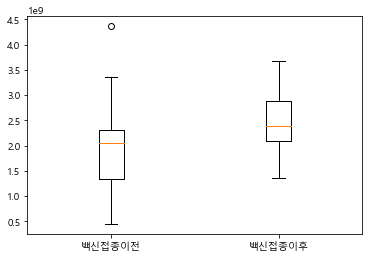

In [14]:
#boxplot을 통한 평균 차이 확인
plt.boxplot([seoul_bv_sell,seoul_av_sell])
plt.xticks([1,2],['백신접종이전','백신접종이후'])

In [15]:
shapiro(seoul_av_sell-seoul_bv_sell)
# 귀무가설 :데이터는 정규분포 이다.
# 대립가설: 데이터는 정규분포가 아니다


#pvalue가 0.05보다 크므로 귀무가설 채택

ShapiroResult(statistic=0.9638534188270569, pvalue=0.40734171867370605)

In [16]:
(seoul_av_sell-seoul_bv_sell).mean().astype(int)

547425957

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '주')

Text(0, 0.5, '접종시작후 매출액 차이')

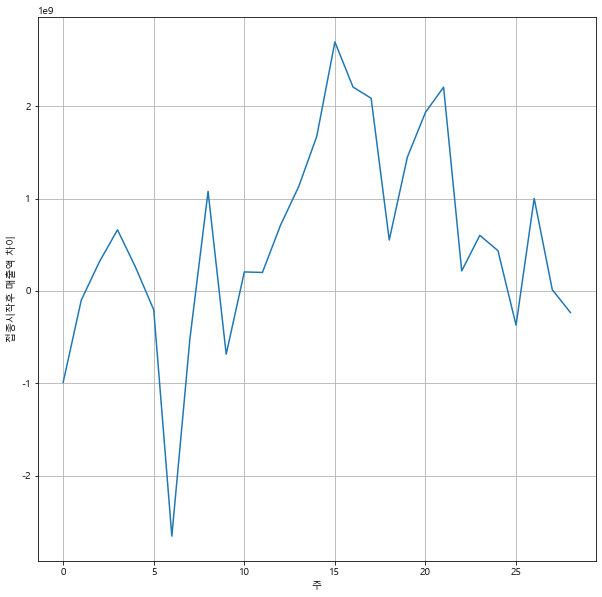

In [17]:
plt.figure(figsize=(10,10))
plt.grid()

plt.plot(seoul_av_sell-seoul_bv_sell)
plt.xlabel('주')
plt.ylabel('접종시작후 매출액 차이')

In [18]:
ttest_rel(seoul_av_sell, seoul_bv_sell)

#pvalue 0.05보다 낮으므로, 백신을 맞기전과 맞은후의 매출액에 차이가 존재함.

Ttest_relResult(statistic=2.604505556709834, pvalue=0.014561884259496628)

# 추가 시각화 (산점도, 회귀선)

(array([18475., 18506., 18536., 18567., 18597., 18628., 18659., 18687.,
        18718., 18748., 18779., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '주차')

Text(0, 0.5, '매출액')

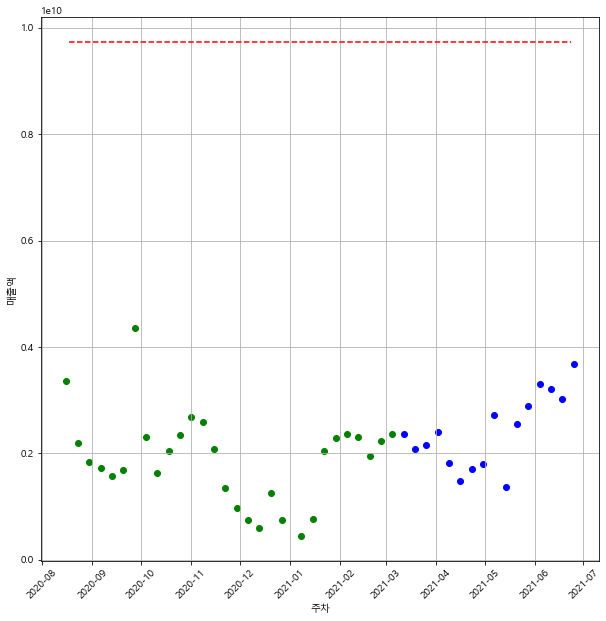

In [19]:
ax = plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(seoul_bv['주'], seoul_bv['매출액'], c='g')
plt.scatter(seoul_av['주'], seoul_av['매출액'], c='b')
plt.axhline(int(avr_2019['매출액'][0]),0.05, 0.95, color = 'red', linestyle = '--',label='2019주평균' )
plt.xticks(rotation=45)
plt.xlabel('주차')
plt.ylabel('매출액')

In [20]:
seoul_av['주차'] = [i for i in range(30,46)]
seoul_bv['주차'] = [i for i in range(1,30)]

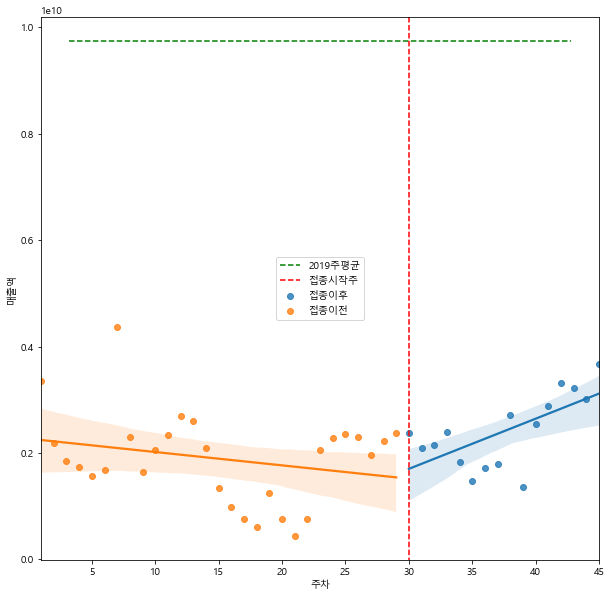

In [21]:
fig = plt.figure(figsize = [10,10])
#ax = fig.add_subplot(111)
plt.axhline(int(avr_2019['매출액'][0]),0.05, 0.95, color = 'green', linestyle = '--',label='2019주평균' )

plt.axvline(30,1, 0, color = 'red', linestyle = '--',label='접종시작주' )

ax = sns.regplot(x='주차',y='매출액',data=seoul_av,label='접종이후')
ax = sns.regplot(x='주차',y='매출액',data=seoul_bv,label='접종이전')
ax.legend(loc='center')



# 4. 주간 접종자수 - 매출액 상관분석 && 누적 접종자수 - 매출액 상관분석

## 내일 하자